c:\Users\ipsit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Original Image Size: 466.44 KB
Compressed Image Size: 97.23 KB
Compression Ratio: 0.21


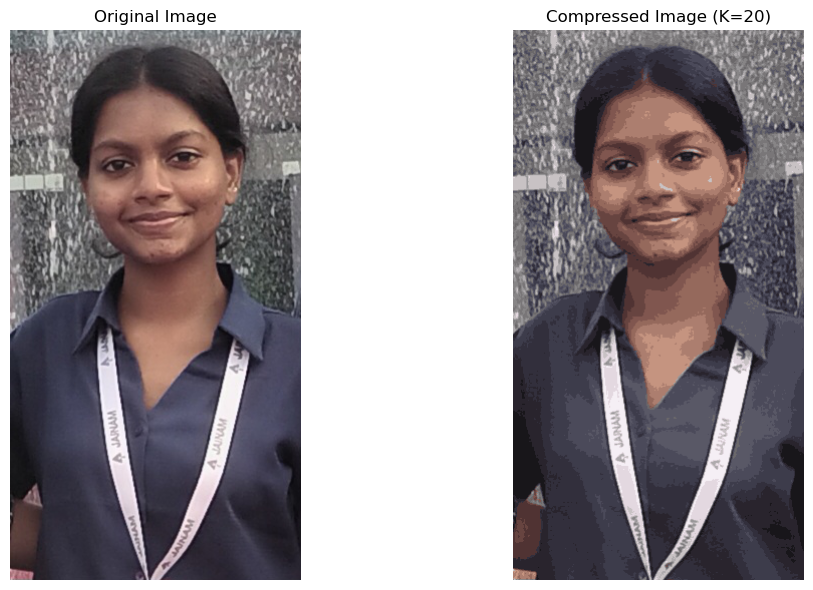

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread

# Step 1: Load the image
image = imread(r"")  # Replace with your image path
image = image / 255.0  # Normalize pixel values to [0, 1]
original_shape = image.shape

# Step 2: Reshape the image into a 2D array of pixels
pixels = image.reshape(-1, 3)  # Flatten the image into (num_pixels, 3)
num_pixels = pixels.shape[0]

# Step 3: Apply K-Means clustering
K = 20  # Number of clusters/colors
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixels)

# The cluster centers are the new color palette
palette = kmeans.cluster_centers_

# Each pixel is assigned to the nearest cluster center
compressed_pixels = palette[kmeans.labels_]

# Step 4: Reshape back to the original image dimensions
compressed_image = compressed_pixels.reshape(original_shape)

# Step 5: Calculate original and compressed size
# Original image size
bits_per_pixel = 24  # RGB image: 8 bits each for R, G, B
original_size_bits = num_pixels * bits_per_pixel

# Compressed image size
centroid_bits = K * 24  # Each centroid requires 24 bits
index_bits = int(np.ceil(np.log2(K)))  # Bits needed to represent a cluster index
compressed_size_bits = centroid_bits + (num_pixels * index_bits)

# Convert to kilobytes (1 byte = 8 bits, 1 KB = 1024 bytes)
original_size_kb = original_size_bits / (8 * 1024)
compressed_size_kb = compressed_size_bits / (8 * 1024)

# Step 6: Display the results
print(f"Original Image Size: {original_size_kb:.2f} KB")
print(f"Compressed Image Size: {compressed_size_kb:.2f} KB")
print(f"Compression Ratio: {compressed_size_kb / original_size_kb:.2f}")

# Step 7: Display the original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(compressed_image)
axes[1].set_title(f"Compressed Image (K={K})")
axes[1].axis("off")

plt.tight_layout()
plt.show()
